**<title>Data Story Telling</title>**

**<h1>Data Storytelling</h1>**

**<subtitle>Theme: Human Development Index (Indeks Pembangunan Manusia)</subtitle>**

<hr>



In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [129]:
df = pd.read_excel("HDI Indonesia.xlsx", sheet_name='Sheet1')
df.head()

,Provinsi,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ACEH,67.09,67.45,67.81,68.30,68.81,69.45,70.00,70.60,71.19,71.90,71.99,72.18,72.80
1,SUMATERA UTARA,67.09,67.34,67.74,68.36,68.87,69.51,70.00,70.57,71.18,71.74,71.77,72.00,72.71
2,SUMATERA BARAT,67.25,67.81,68.36,68.91,69.36,69.98,70.73,71.24,71.73,72.39,72.38,72.65,73.26
3,RIAU,68.65,68.90,69.15,69.91,70.33,70.84,71.20,71.79,72.44,73.00,72.71,72.94,73.52
4,JAMBI,65.39,66.14,66.94,67.76,68.24,68.89,69.62,69.99,70.65,71.26,71.29,71.63,72.14


In [130]:
df.dtypes

Provinsi     object
2010         object
2011         object
2012         object
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
2018        float64
2019        float64
2020        float64
2021        float64
2022        float64
dtype: object

In [131]:
df.replace('-', np.nan, inplace=True)
df['2010'] = df['2010'].astype(float)
df['2011'] = df['2011'].astype(float)
df['2012'] = df['2012'].astype(float)

In [132]:
df.dtypes

Provinsi     object
2010        float64
2011        float64
2012        float64
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
2018        float64
2019        float64
2020        float64
2021        float64
2022        float64
dtype: object

In [133]:
# df.set_index('Provinsi', inplace=True)

**1. Perkembangan indeks pembangunan manusia di Indonesia pada tahun (2013 - 2022)**

In [134]:
provinsi_list = []
tahun_list = []
hdi_list = []

# Loop melalui setiap baris di data_sumber
for index, row in df.iterrows():
    provinsi = row['Provinsi']
    for tahun in row.index[1:]:  # Lewati kolom 'Provinsi' dan iterasi hanya kolom tahun
        provinsi_list.append(provinsi)  # Tambahkan nama provinsi
        tahun_list.append(int(tahun))  # Tambahkan tahun sebagai integer
        hdi_list.append(row[tahun])  # Tambahkan nilai umur harapan hidup (HDI)

# Buat DataFrame dari list yang sudah terisi
data_prep = pd.DataFrame({
    'Provinsi': provinsi_list,
    'Tahun': tahun_list,
    'HDI': hdi_list
})

print(data_prep)

      Provinsi  Tahun    HDI
0         ACEH   2010  67.09
1         ACEH   2011  67.45
2         ACEH   2012  67.81
3         ACEH   2013  68.30
4         ACEH   2014  68.81
..         ...    ...    ...
450  INDONESIA   2018  71.39
451  INDONESIA   2019  71.92
452  INDONESIA   2020  71.94
453  INDONESIA   2021  72.29
454  INDONESIA   2022  72.91

[455 rows x 3 columns]


In [ ]:
data_indonesia = data_prep[data_prep['Provinsi'] == 'INDONESIA']
data_indonesia['Negara'] = data_prep[data_prep['Provinsi'] == 'INDONESIA']

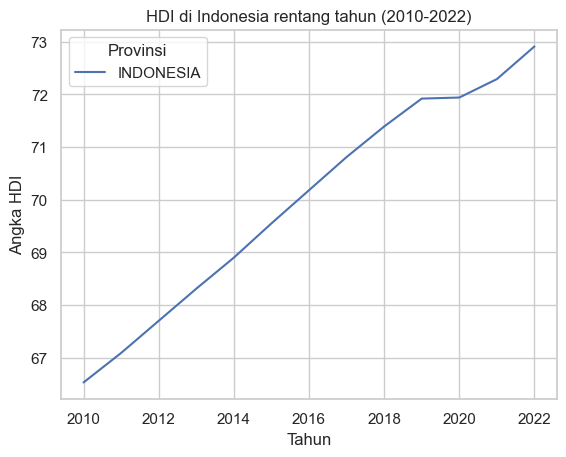

In [136]:
sns.lineplot(x='Tahun', y='HDI', hue='Provinsi', data=data_indonesia)

# Customize plot
plt.title('HDI di Indonesia rentang tahun (2010-2022)')
plt.xlabel('Tahun')
plt.ylabel('Angka HDI')

# Show plot
plt.show()

**2. Perbandingan Presentase jumlah provinsi di setiap kategori IPM pada tahun 2022 dan sebelum tahun 2022**

Menurut BPS, Indeks Pembangunan Manusia dikelompokan menjadi 4 kategori yaitu:
- IPM < 60 : IPM rendah
- 60 IPM < 70 : IPM sedang
- 70 IPM < 80 : IPM tinggi
- IPM 80 : IPM sangat tinggi

**3. Indeks Pembangunan Manusia berdasarkan provinsi pada tahun 2022**

**4. Perbandingan Indeks Pembangunan Manusia di daerah `Jawa Tengah`, `Jawa Barat` dan `Jawa Timur` dari tahun 2010 - 2022**

**5. Perbandingan Rata-Rata Indeks Pembangunan Manusia dan Harapan Lama Sekolah pada tahun 2013 - 2022**

Menurut BPS, Indeks Pembangunan Manusia dibagi menjadi beberapa dimensi yaitu:
- Umur panjang dan hidup sehat
- Pengetahuan
- Standar hidup layak

Untuk dimensi Pengetahuan dibagi lagi menjadi beberapa komponen penilaian yaitu:
- Rata-rata Lama Sekolah (MYS)
-	Harapan Lama Sekolah (HLS)
-	Angka Kesiapan Sekolah (AKS)
-	Persentase Satuan Pendidikan yang mempunyai guru yang mengajar muatan lokal bahasa daerah dan/atau seni budaya
-	Persentase penduduk penyandang disabilitas usia 7-18 tahun yang bersekolah
-	Partisipasi pendidikan penduduk usia 7-18 tahun dengan kategori 40% termisikin

Untuk data HLS dapat diunduh pada link berikut:
https://www.bps.go.id/indicator/26/417/2/-metode-baru-harapan-lama-sekolah.html


**6. Rata-rata Indeks Pembangunan Manusia dari setiap provinsi**

**7. Perbandingan rata-rata Indeks Pembangunan Manusia pada `DKI Jakarta` dan `Papua`**

**8. Perbandingan Indeks Pembangunan Manusia antara provinsi `DKI Jakarta` dan `Papua` pada tahun 2010 - 2022**

**9. Gabungkan grafik pada nomor 7 dan 8 menjadi 1 visualisasi**

**10. Perbandingan Indeks Pembangunan Manusia berdasarkan kategorinya pada tahun 2010 - 2022**